In [100]:
import pandas as pd
import numpy as np 

path='Downloads//exo_simplon//dossier_simplon_chomage//chomage_zone.xls'
liste_feuille='txcho_ze'

data=pd.read_excel('Downloads//exo_simplon//dossier_simplon_chomage//chomage_zone.xls', sheet_name=liste_feuille, skiprows=5) 

data_T1_2020=data['2020-T1']>7.1
data_T1_2019=data['2019-T1']>7.1
data_T1_2018=data['2018-T1']>7.1
data_7_1= data_T1_2018 & data_T1_2019 & data_T1_2020
dataframe1=pd.DataFrame(data_7_1, columns=['booleen'])
path='Downloads//exo_simplon//dossier_simplon_chomage//pole_emploi.xlsx'
p_emploi=pd.read_excel(path,skiprows=3, columns=['code','libellé','P_E_2018'])
p_emploi.rename(columns={'Code':'REG','Libellé':'libellé', 'Pôle emploi 2018':'p_e_2018'}, inplace=True)
p_emploi.sort_values(by=['REG'])
data.sort_values('REG')
data_combo=p_emploi.merge(data, how='right')
liste_quantile=['q25','q50','q75','q100']
data_combo['quantile']=pd.qcut(data_combo['p_e_2018'],4,labels=liste_quantile )


In [133]:
#1) En utilisant groupby() et mean() successivement ,calculer le taux de chômage moyen par régions pour chaque trimesre . dans le groupby ,mettre as_index='False'. l'assigner à data_grp.

data_grp=data.groupby('LIBREG', as_index=False).mean()
print(data_grp)

                        LIBREG   REG   2003-T1    2003-T2   2003-T3  \
0         Auvergne-Rhône-Alpes  84.0  6.877143   7.022857  6.957143   
1      Bourgogne-Franche-Comté  27.0  6.760870   6.926087  6.891304   
2                     Bretagne  53.0  6.466667   6.627778  6.633333   
3          Centre-Val-de-Loire  24.0  7.105263   7.357895  7.373684   
4                        Corse  94.0  9.685714   9.342857  9.385714   
5                    Grand-Est  44.0  7.103226   7.306452  7.264516   
6              Hauts-de-France  32.0  9.930769  10.084615  9.880769   
7                Ile-de-France  11.0  6.636842   6.963158  6.926316   
8                    Normandie  28.0  7.705000   7.860000  7.735000   
9           Nouvelle-Aquitaine  75.0  7.487097   7.664516  7.600000   
10                   Occitanie  76.0  9.353333   9.360000  9.226667   
11            Pays de la Loire  52.0  6.194737   6.331579  6.278947   
12  Provence-Alpes-Côte d'Azur  93.0  9.400000   9.488235  9.241176   
13    

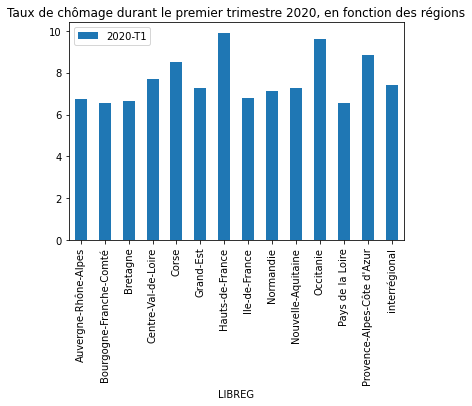

In [157]:
#### 2) utiliser pandas.plot() pour tracer l'histogramme du taux de chomage du premier trimestre 2020. les nomns de régions doivent apparaitre en abscisse

data_grp.plot(kind='bar', x='LIBREG' , y='2020-T1', title='Taux de chômage durant le premier trimestre 2020, en fonction des régions' )

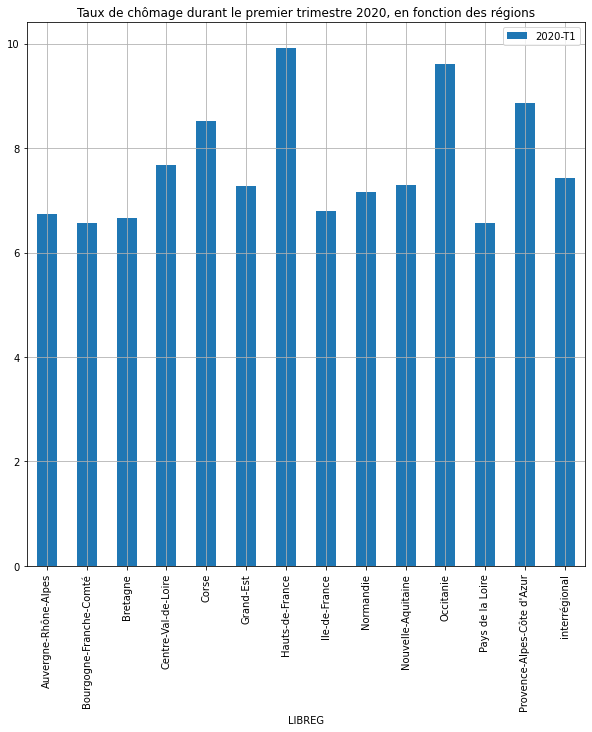

In [156]:
#3 En vous appuyant sur la documentation en ligne donné une taille correct au graphique, lui donner un titre et ajouter une grille en arrière plan.
data_grp.plot(kind='bar', x='LIBREG' , y='2020-T1',figsize=(10,10),grid=True, title='Taux de chômage durant le premier trimestre 2020, en fonction des régions' )


In [155]:
#4 En repartant du jeux de données originel, isoler les colonnes 3 à 73. et assignées les à
data2=data[:][3:74]
print(data2)

   ZE2010                  LIBZE2010   REG               LIBREG  2003-T1  \
3    0053                      Mâcon   0.0        interrégional      5.3   
4    0054           Nogent-le-Rotrou   0.0        interrégional      5.9   
5    0055  Vallée de la Bresle-Vimeu   0.0        interrégional      7.6   
6    0056      Roissy - Sud Picardie   0.0        interrégional      8.9   
7    0057         Brive-la-Gaillarde   0.0        interrégional      6.0   
..    ...                        ...   ...                  ...      ...   
69   2415                    Vendôme  24.0  Centre-Val-de-Loire      6.4   
70   2416                       Gien  24.0  Centre-Val-de-Loire      5.8   
71   2417                  Montargis  24.0  Centre-Val-de-Loire      7.8   
72   2418                    Orléans  24.0  Centre-Val-de-Loire      5.5   
73   2419                 Pithiviers  24.0  Centre-Val-de-Loire      5.3   

    2003-T2  2003-T3  2003-T4  2004-T1  2004-T2  ...  2017-T4  2018-T1  \
3       5.3  

In [135]:
#5 En utilisant groupby () et mean () successivement calculer le taux de chômage moyen par régions pour chaque trimestres. Cette fois ci ne pas préciser l’instruction as_index . L’assigner à data_grp2.
data_grp2=data.groupby(['LIBREG']).mean()
print(data_grp2)

                             REG   2003-T1    2003-T2   2003-T3    2003-T4  \
LIBREG                                                                       
Auvergne-Rhône-Alpes        84.0  6.877143   7.022857  6.957143   7.188571   
Bourgogne-Franche-Comté     27.0  6.760870   6.926087  6.891304   7.317391   
Bretagne                    53.0  6.466667   6.627778  6.633333   6.866667   
Centre-Val-de-Loire         24.0  7.105263   7.357895  7.373684   7.773684   
Corse                       94.0  9.685714   9.342857  9.385714   9.500000   
Grand-Est                   44.0  7.103226   7.306452  7.264516   7.654839   
Hauts-de-France             32.0  9.930769  10.084615  9.880769  10.330769   
Ile-de-France               11.0  6.636842   6.963158  6.926316   7.231579   
Normandie                   28.0  7.705000   7.860000  7.735000   8.085000   
Nouvelle-Aquitaine          75.0  7.487097   7.664516  7.600000   7.900000   
Occitanie                   76.0  9.353333   9.360000  9.226667 

In [125]:
#6 Transposer le dataframe
transpose_=data_grp2.transpose()
transpose_

LIBREG,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val-de-Loire,Corse,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,interrégional
REG,84.000000,27.000000,53.000000,24.000000,94.000000,44.000000,32.000000,11.000000,28.000,75.000000,76.000000,52.000000,93.000000,0.000000
2003-T1,6.877143,6.760870,6.466667,7.105263,9.685714,7.103226,9.930769,6.636842,7.705,7.487097,9.353333,6.194737,9.400000,7.055556
2003-T2,7.022857,6.926087,6.627778,7.357895,9.342857,7.306452,10.084615,6.963158,7.860,7.664516,9.360000,6.331579,9.488235,7.222222
2003-T3,6.957143,6.891304,6.633333,7.373684,9.385714,7.264516,9.880769,6.926316,7.735,7.600000,9.226667,6.278947,9.241176,7.144444
2003-T4,7.188571,7.317391,6.866667,7.773684,9.500000,7.654839,10.330769,7.231579,8.085,7.900000,9.583333,6.605263,9.464706,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-T1,7.428571,7.339130,7.394444,8.621053,9.642857,7.996774,11.069231,7.357895,7.965,8.164516,10.796667,7.031579,10.029412,8.188889
2019-T2,7.214286,7.208696,7.172222,8.426316,9.128571,7.790323,10.696154,7.152632,7.665,7.909677,10.500000,6.863158,9.705882,7.966667
2019-T3,7.240000,7.239130,7.194444,8.452632,8.957143,7.861290,10.653846,7.242105,7.645,7.925806,10.403333,6.952632,9.600000,8.011111
2019-T4,6.962857,6.908696,6.883333,8.052632,8.728571,7.496774,10.280769,6.947368,7.385,7.574194,9.993333,6.763158,9.182353,7.733333


In [126]:
#6 Réindexer le dataframe avec reset_index
transpose_.reset_index(inplace=True)
transpose_

LIBREG,index,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val-de-Loire,Corse,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,interrégional
0,REG,84.000000,27.000000,53.000000,24.000000,94.000000,44.000000,32.000000,11.000000,28.000,75.000000,76.000000,52.000000,93.000000,0.000000
1,2003-T1,6.877143,6.760870,6.466667,7.105263,9.685714,7.103226,9.930769,6.636842,7.705,7.487097,9.353333,6.194737,9.400000,7.055556
2,2003-T2,7.022857,6.926087,6.627778,7.357895,9.342857,7.306452,10.084615,6.963158,7.860,7.664516,9.360000,6.331579,9.488235,7.222222
3,2003-T3,6.957143,6.891304,6.633333,7.373684,9.385714,7.264516,9.880769,6.926316,7.735,7.600000,9.226667,6.278947,9.241176,7.144444
4,2003-T4,7.188571,7.317391,6.866667,7.773684,9.500000,7.654839,10.330769,7.231579,8.085,7.900000,9.583333,6.605263,9.464706,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-T1,7.428571,7.339130,7.394444,8.621053,9.642857,7.996774,11.069231,7.357895,7.965,8.164516,10.796667,7.031579,10.029412,8.188889
66,2019-T2,7.214286,7.208696,7.172222,8.426316,9.128571,7.790323,10.696154,7.152632,7.665,7.909677,10.500000,6.863158,9.705882,7.966667
67,2019-T3,7.240000,7.239130,7.194444,8.452632,8.957143,7.861290,10.653846,7.242105,7.645,7.925806,10.403333,6.952632,9.600000,8.011111
68,2019-T4,6.962857,6.908696,6.883333,8.052632,8.728571,7.496774,10.280769,6.947368,7.385,7.574194,9.993333,6.763158,9.182353,7.733333


In [128]:
#7 renommer le nom de la colonne'index' en 'periode'
transpose_.rename(columns={'index':'periode'}, inplace=True)
transpose_

LIBREG,periode,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val-de-Loire,Corse,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,interrégional
0,REG,84.000000,27.000000,53.000000,24.000000,94.000000,44.000000,32.000000,11.000000,28.000,75.000000,76.000000,52.000000,93.000000,0.000000
1,2003-T1,6.877143,6.760870,6.466667,7.105263,9.685714,7.103226,9.930769,6.636842,7.705,7.487097,9.353333,6.194737,9.400000,7.055556
2,2003-T2,7.022857,6.926087,6.627778,7.357895,9.342857,7.306452,10.084615,6.963158,7.860,7.664516,9.360000,6.331579,9.488235,7.222222
3,2003-T3,6.957143,6.891304,6.633333,7.373684,9.385714,7.264516,9.880769,6.926316,7.735,7.600000,9.226667,6.278947,9.241176,7.144444
4,2003-T4,7.188571,7.317391,6.866667,7.773684,9.500000,7.654839,10.330769,7.231579,8.085,7.900000,9.583333,6.605263,9.464706,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-T1,7.428571,7.339130,7.394444,8.621053,9.642857,7.996774,11.069231,7.357895,7.965,8.164516,10.796667,7.031579,10.029412,8.188889
66,2019-T2,7.214286,7.208696,7.172222,8.426316,9.128571,7.790323,10.696154,7.152632,7.665,7.909677,10.500000,6.863158,9.705882,7.966667
67,2019-T3,7.240000,7.239130,7.194444,8.452632,8.957143,7.861290,10.653846,7.242105,7.645,7.925806,10.403333,6.952632,9.600000,8.011111
68,2019-T4,6.962857,6.908696,6.883333,8.052632,8.728571,7.496774,10.280769,6.947368,7.385,7.574194,9.993333,6.763158,9.182353,7.733333


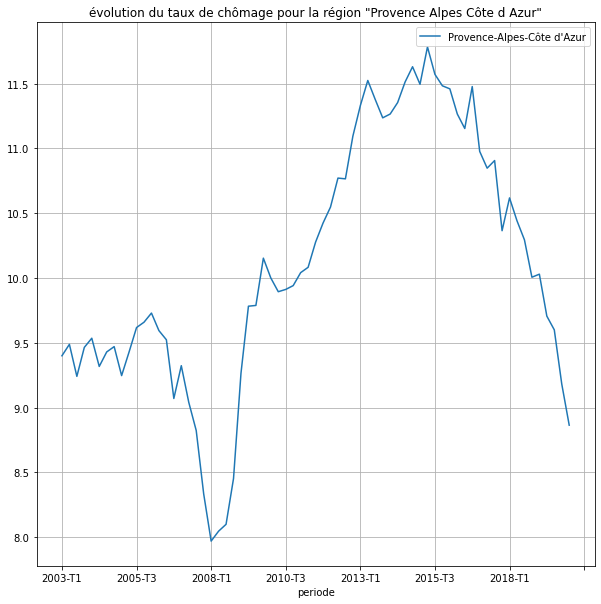

In [151]:
#10 Après avoir visualisé le contenu de data2, utiliser pandas.plot () pour tracer la ligne représentant l’évolution du taux de chômage pour la région ‘Provence Alpes Côte d'Azur’.

transpose_[:][1:].plot(kind='line',x='periode', y="Provence-Alpes-Côte d'Azur", figsize=(10,10), title='évolution du taux de chômage pour la région "Provence Alpes Côte d Azur"',grid=True)


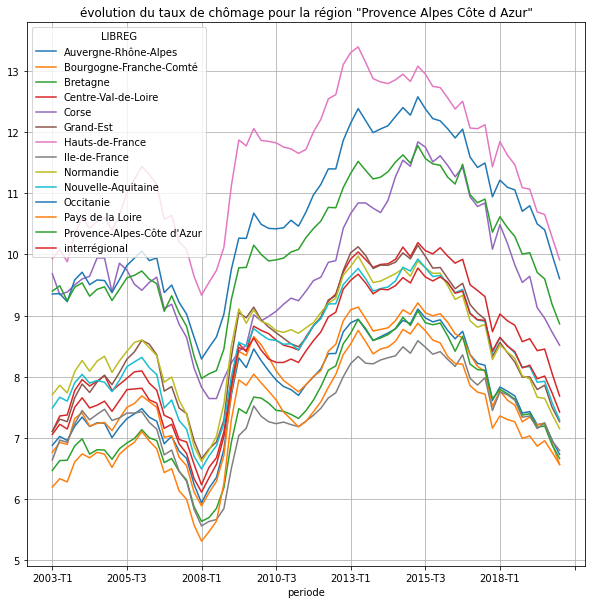

In [150]:
#11 Répéter l’étape précédente sans préciser l’argument "y ="
transpose_[:][1:].plot(kind='line',x='periode', figsize=(10,10), title='évolution du taux de chômage pour la région "Provence Alpes Côte d Azur"',grid=True)

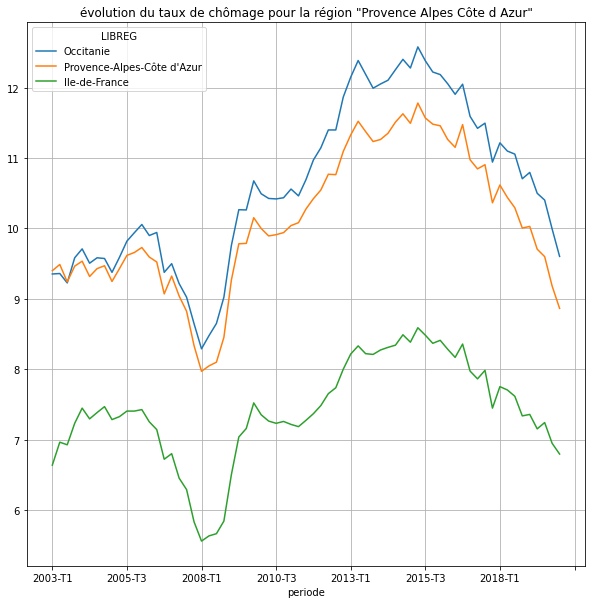

In [147]:
#13 Représenter l’évolution du taux de chômage pour la région ‘Provence Alpes Côte d'Azur’, ‘Occitanie’ et ‘Ile de France’ sur un même graphique.

transpose_[:][1:].plot(kind='line',x='periode',y=["Occitanie","Provence-Alpes-Côte d'Azur", "Ile-de-France"], figsize=(10,10), title='évolution du taux de chômage pour la région "Provence Alpes Côte d Azur"',grid=True)
